<div style="border:solid Chocolate 2px; padding: 40px">
<b>Привет, Мария!👋</b>
    
Меня зовут Зуева Юлия, можно просто Юля 😏 Я буду ревьюером твоего проекта. Предлагаю обращаться на "ты", но если это неудобно, пожалуйста, скажи об этом!
    
Моя основная цель - помочь тебе стать компетентным Data Scientist'ом: вместе преодолеть трудности и еще больше развить твои сильные навыки 💪 Очень постараюсь сделать это как можно быстрее :) В твоей работе я оставила комментарии, которые должны в этом помочь. Для твоего удобства комментарии расскрашены разными цветами: 
<br/>
<div class="alert alert-success">
<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным, или если я посчитаю нужным тебя за что-то похвалить. На такие решения можно опираться в будущих проектах.
</div>
<div class="alert alert-warning">
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).
</div>
<div class="alert alert-block alert-danger">
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Чтобы наша с тобой работа была еще эффективнее, ты точно так же можешь оставлять комментарии и задавать мне вопросы. Для таких случаев, пожалуйста, выбери собственное оформление комментариев, которое будет отличаться от моего, чтобы не создавалась путаница. По этой же причине попрошу тебя не удалять и не изменять мои комментарии. Все это позволит лучше ориентироваться в нашем с тобой диалоге, а повторную проверку (в случае ее необходимости) выполнять оперативнее 🚀
    
Не спеши расстраиваться, если что-то не удалось с первого раза. Вместе мы обязательно разберемся со всеми трудностями! 🤓

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Очень хорошо, что оставляешь в начале проекта его описание! Любой, кто захочет взглянуть на работу, сможет сразу погрузиться в суть задачи. Будет немного лучше, если ты его чуть-чуть перефрзируешь, изложишь задачу, цели, вводные данные, важные моменты своими словами, продумаешь план действий, так работа станет похожа на настоящий исследовательский проект, а не выполненное домашнее задание :)

## Подготовка данных

Загружаем библиотеки.

In [1]:
!pip install phik -q

In [2]:
pip install lightgbm -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost -q

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install optuna-integration[sklearn] -q

In [5]:
!pip install --user --upgrade scikit-learn -q

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы вся эта информация не выводилась при установке, можно добавить в конце строки `-q`.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import phik
import os
import time
import lightgbm as  lgb

from matplotlib import rcParams
from scipy import stats as st
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler
)

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer 

from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error
)
    
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

import optuna
from optuna.integration import OptunaSearchCV 
from optuna import distributions
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Для удобства их можно организовать по темам (например, для работы с датасетом, графики, подготовка к обучению, моделирование).

Загружаем данные.

In [7]:
pth1 = '/datasets/autos.csv'
pth2 = 'https://code.s3.yandex.net/datasets/autos.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

Проверяем корректность загрузки.

In [8]:
display(data.head())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Приведем для удобства названия столбцов к нижнему регистру и вставим в названия нижний прочерк.

In [9]:
data.columns = data.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()    

In [10]:
#data.columns = [x.lower() for x in data.columns]

In [11]:
# data=data.rename(columns={'datecrawled': 'date_crawled', 'vehicletype': 'vehicle_type',\
#                           'registrationyear':'registration_year','registrationmonth':'registration_month',\
#                          'fueltype':'fuel_type','datecreated':'date_created', \
#                           'numberofpictures': 'number_of_pictures', 'postalcode': 'postal_code',
#        'lastseen': 'last_seen'})

Проверяем названия столбцов после преобразования.

In [12]:
data.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы вручную не прописывать новые наименовая переменных, можно сгенерировать их, используя регулярные выражения: 
    
```python
df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()    
```

<div class="alert alert-info">
Исправила
</div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

Теперь выведем общую информацию о датафрейме и число полных дубликатов.

In [13]:
data.info()
display(f'Дубликатов {data.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  repaired            283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

'Дубликатов 4'

4 дубликата на 354365  записей можно удалить без потери информации.

In [14]:
data=data.drop_duplicates()

In [15]:
display(f'Дубликатов {data.duplicated().sum()}')

'Дубликатов 0'

<a id='section1'></a> 
### Пропуски

Выведем общее число пропусков в таблице.

In [16]:
data.isna().sum().sort_values()

date_crawled              0
price                     0
registration_year         0
power                     0
kilometer                 0
registration_month        0
brand                     0
date_created              0
number_of_pictures        0
postal_code               0
last_seen                 0
model                 19705
gearbox               19833
fuel_type             32895
vehicle_type          37490
repaired              71154
dtype: int64

Изучим более подробно столбцы с пропусками.

Посмотрим, какие значения принимает модель автомобиля.

In [17]:
data['model'].unique()

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'other', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'c4', 'civic', 'transporter',
       'punto', 'e_klasse', 'clio', 'kadett', 'kangoo', 'corsa', 'one',
       'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8', 'jetta',
       'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia', 'combo',
       'focus', 'tt', 'a6', 'jazz', 'omega', 'slk', '7er', '80', '147',
       '100', 'z_reihe', 'sportage', 'sorento', 'v40', 'ibiza', 'mustang',
       'eos', 'touran', 'getz', 'a3', 'almera', 'megane', 'lupo', 'r19',
       'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox'

Среди моделей есть значение 'other', по-видимому для тех автомобилей, для которых модель неизвестна.

Посмотрим, сколько строк с таким значением.

In [18]:
data[data['model']=='other'].shape[0]

24420

24420 строк- довольно много, чтобы игнорировать эти значения.

Заменим пропуски в столбце 'model' на 'other', чтобы эта была одна категория неизвестных моделей.

In [19]:
data['model']=data['model'].fillna('other')

Посмотрим теперь, какую часть занимает эта категория.

In [20]:
data[data['model']=='other'].shape[0]/data.shape[0]

0.12451850493135609

12% от всех записей - автомобили категории  'other'.

Теперь рассмотрим столбец с коробкой передач.

Посмотрим, какие значения принимает столбец 'gearbox'.

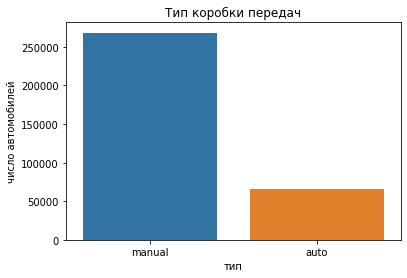

In [21]:
sns.countplot(data=data, x='gearbox')

plt.title('Тип коробки передач') 
plt.xlabel('тип') 
plt.ylabel('число автомобилей')
plt.show() 

Точное количество машин обоих категорий выведем с помощью сводной таблицы.

In [22]:
data.pivot_table(index='gearbox', values='date_crawled',aggfunc='count')

,date_crawled
gearbox,
auto,66283
manual,268249


Заменить пропуски (их 19833 в этом столбце) на то или другое значение мы не можем, предлагается заменить их на неизвестную категорию 'unknown'.

In [23]:
data['gearbox']=data['gearbox'].fillna('unknown')

Теперь исследуем столбец 'fuel_type'.

Посмотрим, какие значения принимает этот столбец.

In [24]:
data.pivot_table(index='fuel_type', values='date_crawled',aggfunc='count').sort_values(by='date_crawled',ascending=False)

,date_crawled
fuel_type,
petrol,216349
gasoline,98719
lpg,5310
cng,565
hybrid,233
other,204
electric,90


Машин на бензине более чем в 2 раза больше, чем на газу, остальные категории на порядок меньше.

Пропусков в этом столбце 32895 - практически треть от числа машин с газовым топливом, это очень много, но в то же время отнести эти пропуски к какой-либо категории нельзя, поэтому предлагается снова заменить их на неизвестную категорию 'unknown'.

In [25]:
data['fuel_type']=data['fuel_type'].fillna('unknown')

Теперь исследуем столбец 'vehicle_type'.

In [26]:
data.pivot_table(index='vehicle_type', values='date_crawled',aggfunc='count').sort_values(by='date_crawled',ascending=False)

,date_crawled
vehicle_type,
sedan,91457
small,79830
wagon,65165
bus,28775
convertible,20203
coupe,16161
suv,11996
other,3288


Теоретически, для записей с изветной маркой и моделью автомобиля, а так же годом регистрации автомобиля, можно было бы восстановить значения типа кузова, но эта работа потребует отдельного исследования.

<div class="alert alert-info">
    
Попыталась заменить пропуски в типе кузова на самое часто встречающееся значение в тех же марках и моделях, код закомментирован в следующей ячейке, но он не сработал за 10 минут, поэтому оставила категорию 'unknown'.
    
Больше того, считаю, что тип кузова однозначно восстанавливается по году, марке и модели, поэтому этот признак для нас избыточен, и его можно исключить из рассмотрения.

</div>

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Вместо цикла можно сформировать вектор со значениями моды для каждой строки, в зависимости от того, к какой группе она принадлежит. Для этого группируем данные по нужным нам группам и используем <a href='https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html'>transform</a>, в котором указываем, что нам нужна мода (можно посмотреть примеры по ссылке). Затем мы можем использовать данные вектор для заполнения пропусков через fillna.
    
    
С последним тезисом не соглашусь, если посчитать количество уникальных значений в каждой группе, то оно далеко не везде будет равно 1: 
    
```python
data.groupby(['brand', 'model', 'registration_year']) \
    .agg({'vehicle_type': lambda x: len(x.unique())}) \
    .value_counts()    
```

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Попыталась найти моду по группам.
    
Если группировать по марке и модели, мода считается, если по марке, модели и году, то уже не считается.
    
Код в следующих двух ячейках, первый работает, второй нет. Это удивительно, преподаватель не знает, почему оно не считается.
    
Поэтому оставила свое предыдущее решение.
</div>


<div class="alert alert-warning">
<h3> Комментарий ревьюера 3<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Второй код у меня падает с ошибкой по той причине, что если в группу попадают только пропуски, то мода не может посчитаться. Чтобы это учесть, можно прописать условие: `lambda x: x.mode()[0] if not x.mode().empty else None`.

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Действительно, с добавлением условия на пропуски, код заработал!
    
Пропуски заменила.
    
Но добавлять vehicle_type в объединенный признак brand_model не стала, потому что когда я пыталась это сделать, все поиски перестали работать, видимо слишком сложная работа для кодировщика оказалась.
</div>


<div class="alert alert-success">
<h3> Комментарий ревьюера 4<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [27]:
# data['hh']=data.groupby(['brand', 'model'])['vehicle_type'].transform(lambda x: x.mode()[0])
# print(data.head())

In [28]:
data['jj']=data.groupby(['brand', 'model', 'registration_year'])['vehicle_type'].transform(lambda x: x.mode()[0] if not x.mode().empty else None)
print(data.head())

          date_crawled  price vehicle_type  registration_year gearbox  power  \
0  2016-03-24 11:52:17    480          NaN               1993  manual      0   
1  2016-03-24 10:58:45  18300        coupe               2011  manual    190   
2  2016-03-14 12:52:21   9800          suv               2004    auto    163   
3  2016-03-17 16:54:04   1500        small               2001  manual     75   
4  2016-03-31 17:25:20   3600        small               2008  manual     69   

   model  kilometer  registration_month fuel_type       brand repaired  \
0   golf     150000                   0    petrol  volkswagen      NaN   
1  other     125000                   5  gasoline        audi      yes   
2  grand     125000                   8  gasoline        jeep      NaN   
3   golf     150000                   6    petrol  volkswagen       no   
4  fabia      90000                   7  gasoline       skoda       no   

          date_created  number_of_pictures  postal_code            last_se

In [29]:
data['vehicle_type']=data['vehicle_type'].fillna(data['jj'])

In [30]:
data=data.drop( ['jj'], 
        axis=1
    )

In [31]:
# for t in data['model'].unique():
#     for s in data['brand'].unique():
#         data.loc[(data['model']==t)&(data['brand']==s)&(data['vehicle_type'].isna()),'vehicle_type']=\
#         data.loc[((data['model']==t)&(data['brand']==s)),'vehicle_type'].mode()


Поэтому предлагается снова создать категорию 'unknown', на которую заменить все пропуски в этом столбце.

In [32]:
data['vehicle_type']=data['vehicle_type'].fillna('unknown')

Последним исследуем столбец с информацией, была ли машина в ремонте или нет.

In [33]:
data.pivot_table(index='repaired', values='date_crawled',aggfunc='count').\
                 sort_values(by='date_crawled',ascending=False)

,date_crawled
repaired,
no,247158
yes,36053


Пропусков в этом столбце 71154  - слишком много, чтобы отнести их к категории yes или no.

Снова заменим пропуски на 'unknown'.

In [34]:
data['repaired']=data['repaired'].fillna('unknown')

Таким образом, все пропуски в таблице (кроме столбца с моделью автомобиля) заменены на категорию 'unknown', неизвестные модели отнесены к категории 'other'.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> 
    
* Это допустимый вариант обработки пропусков в данном случае, однако для некоторых признаков также имеется возможность довольно точно восстановить их значения, вместо того, чтобы отправлять их в замусоренную группу undefined. Для этого мы можем изучить корреляцию данных признаков между собой и задействовать обнаруженную тесную взаимосвязь, чтобы заполнить пропуски самыми частовстречаемыми представителями внутри той или иной группы (например, VehicleType по модели и бренду). Чтобы посчитать корреляцию, можно использовать <a href = 'https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7/'>Phik</a>.
    
    
* Относительно самого явления мультиколоинеарности (скоррелированности признаков между собой). Она является проблемой в случаях интерпретации важности или степени влияния признака на таргет (скоррелированные признаки оказывают на таргет схожий между собой эффект - то есть объяснятся примерно одна и та же вариация таргета - из-за чего и оценка этого влияния размазывается между этими признаками, то есть сам по себе эффект может быть значительным, но из-за того, что распределен между несколькими признаками, они могут начать проигрывать в рейтинге самых влияетельных факторов). Кроме того, наличие мультиколлинеарности приводит к увеличению вычислительной сложности модели - в совокупности с малой дополнительно приносимой пользой (редко признаки скорредированы на все 100%, что-то индивидуально они все же тоже привносят) это может быть существенным минусом, когда время работы модели играет не последнюю роль - наш случай. Поэтому можно задуматься о том, чтобы побороться с мультиколлинеарностью, например, объединить сильно скоррелированные категориальные признаки в один.

### Исследовательский анализ данных.

#### Рассмотрим числовые переменные датафрейма.

Начнем с года регистрации автомобиля.

Выведем все уникальные значения этой переменной.

In [35]:
data['registration_year'].sort_values().unique()

array([1000, 1001, 1039, 1111, 1200, 1234, 1253, 1255, 1300, 1400, 1500,
       1600, 1602, 1688, 1800, 1910, 1915, 1919, 1920, 1923, 1925, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
       1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2066, 2200, 2222, 2290, 2500, 2800, 2900, 3000,
       3200, 3500, 3700, 3800, 4000, 4100, 4500, 4800, 5000, 5300, 5555,
       5600, 5900, 5911, 6000, 6500, 7000, 7100, 7500, 7800, 8000, 8200,
       8455, 8500, 8888, 9000, 9229, 9450, 9996, 99

<div class="alert alert-info">
Посмотрим на последнюю дату скачивания анкеты.
</div>

In [36]:
 data['date_crawled'].max() 

'2016-04-07 14:36:58'

<div class="alert alert-info">
Последняя анкета была скачана 7 апреля 2016 года.
    
Значит, годы регистрации с 2017 по 2019 являются также ошибочными.
    
За 2017 год можно оставить те записи, в которых месяц регистрации меньше 4.    
</div>

In [37]:
data=data[(data['registration_year']<2016) | ((data['registration_year']==2016) & (data['registration_month']<4))]

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Кажется, 2017 год оставлять тоже не совсем корректо, как анкета могла быть создана раньше, чем автомобиль был зарегистрирован. Логичнее ограничить регистрацию как раз до апреля 2016.

<div class="alert alert-info">
Комментарий студента 2
    
Исправила
</div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 3<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

Очевидно, все значения года больше 2019 являются ошибочными.

Поскольку массовое промышленное производство автомобилей началось в 1930-ых годах, то год регистрации не может быть меньше 1930. 

Более того, все значения меньше 1960 скорее всего либо ошибочные, либо редкие раритетные модели.

Посмотрим, какую часть от общего объема данных они занимают.

In [38]:
# data_bad=data[(data['registration_year']<1960) | (data['registration_year']>2019)]
# data_bad.shape[0]
# data_bad.shape[0]/data.shape[0]

Меньше 1 процента, поэтому эти данные можно удалить, чтобы не портить модель.

In [39]:
data=data[(data['registration_year']>1960) & (data['registration_year']<2020)]

Теперь можно построить гистограмму значений года регистрации.

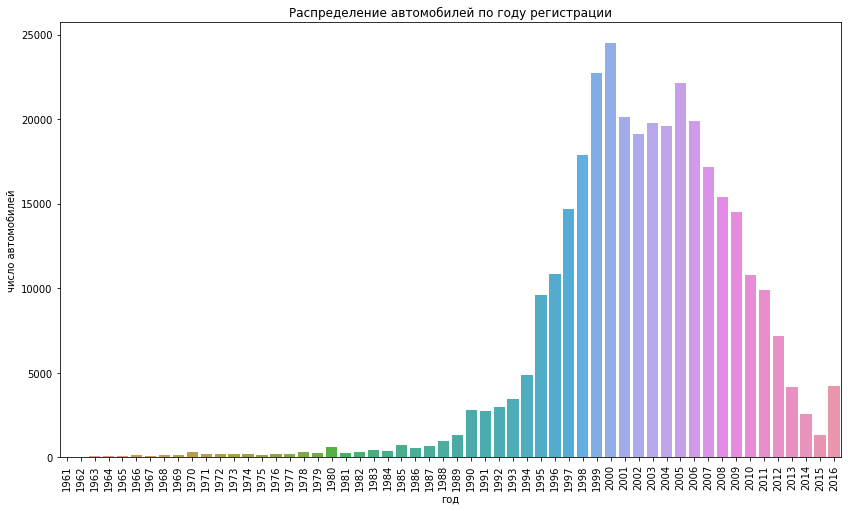

In [40]:
plt.figure(figsize=(14,8))

ax=sns.countplot(data=data, x='registration_year')
ax. set_xticklabels (ax.get_xticklabels (), rotation= 90 )

plt.title('Распределение автомобилей по году регистрации') 
plt.xlabel('год') 
plt.ylabel('число автомобилей')
plt.show() 

Большинство машин зарегистрировано между 1990 и 2019 годами, распределение похоже на нормальное, если не считать скачок за 2016-2018 год, возможно связанный с окончанием гарантийного срока, после которого состоятельные люди стараются избавиться от машины и купить новую.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>

<b>На доработку🤔:</b> Обрати внимание, что выгрузка всех объявлений была произведена не позднее апреля 2016 года. В объявлениях 2016 года никак не могли появиться автомобили с более поздним годом регистрации. Кроме того для определения нерелевантных значений года также важно учитывать, когда было создано и само объявление - date_created (тут бы тебе также пригодился месяц регистрации).

Следующий числовой признак - мощность двигателя.

Рассмотрим значения, которые принимает столбец 'power'.

In [41]:
data['power'].sort_values().unique()

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30,    31,    32,    33,    34,    35,
          36,    37,    38,    39,    40,    41,    42,    43,    44,
          45,    46,    47,    48,    49,    50,    51,    52,    53,
          54,    55,    56,    57,    58,    59,    60,    61,    62,
          63,    64,    65,    66,    67,    68,    69,    70,    71,
          72,    73,    74,    75,    76,    77,    78,    79,    80,
          81,    82,    83,    84,    85,    86,    87,    88,    89,
          90,    91,    92,    93,    94,    95,    96,    97,    98,
          99,   100,   101,   102,   103,   104,   105,   106,   107,
         108,   109,   110,   111,   112,   113,   114,   115,   116,
         117,   118,   119,   120,   121,   122,   123,   124,   125,
         126,   127,

Маломощные автомобили в 10 л.с. существуют, но мощности в 2000 л.с. пока еще никто не достигал. 

В основном, мощности двигателей современных автомобилей не превосходят 500 л.с.

Посмотрим, сколько значений больше 500 в датафрейме.

In [42]:
data_bad=data[(data['power']>500)]

data_bad.shape[0]/data.shape[0]

0.0012160676684747935

Такое малое количество записей можно удалить без потери важной информации.

In [43]:
data=data[data['power']<500]

Построим гистограмму распределения автомобилей по мощности.

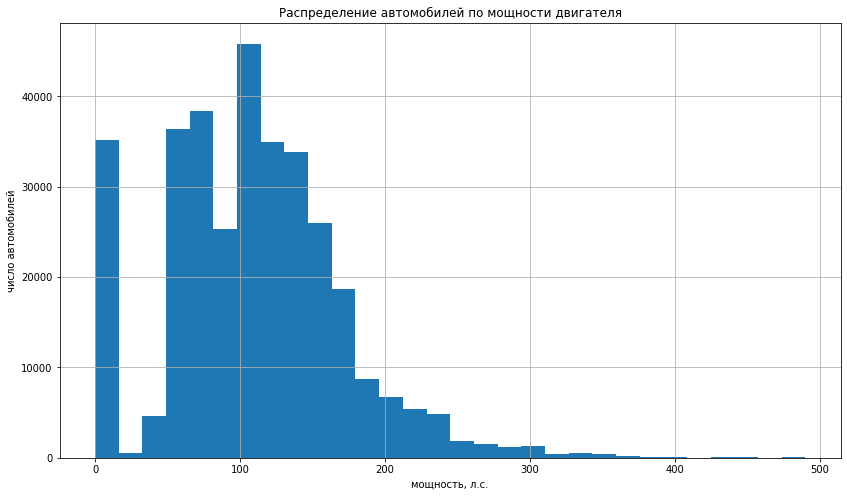

In [44]:
plt.figure(figsize=(14,8))

data['power'].hist(bins=30)

plt.title('Распределение автомобилей по мощности двигателя') 
plt.xlabel('мощность, л.с.') 
plt.ylabel('число автомобилей')
plt.show() 

Из гистограммы видно, что много нулевых значений, оценим их точное количество.

In [45]:
data_bad=data[(data['power']==0)]
data_bad.shape[0]

34836

Почти 40000 нулевых значений, явно ошибочных - это очень много. 

Если не считать этот "скачок" в нуле, распределение машин по мощности выглядит как нормальное, поэтому большой ошибки не будет, если мы заменим нулевые значения на среднее.

Рассчитаем это среднее.

In [46]:
data1=data[data['power']>0]
display(data1['power'].describe())


count    298587.000000
mean        120.624793
std          53.473527
min           1.000000
25%          75.000000
50%         111.000000
75%         150.000000
max         490.000000
Name: power, dtype: float64

Заменим нули на среднее значение.

<div class="alert alert-info">
Заменим нули на среднее значение в группе той же модели.
</div>

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Заменила нули на пропуски.
</div>

In [47]:
data.loc[data['power'] == 0, 'power'] = np.nan

In [48]:
# for t in data['model'].unique():
#     data.loc[(data['model']==t)&(data['power'].isnull()),'power']=\
#         data.loc[(data['model']==t),'power'].mean()


In [49]:
for t in data['model'].unique():
    data.loc[(data['model']==t)&(data['power'].isna()),'power']=\
        data.loc[(data['model']==t),'power'].mean()

In [50]:
data=data.dropna(subset=['power'])

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы большое количество нулей не смещали среднее значение, было бы лучше сначала заменить их на пропуски.

<div class="alert alert-success">
<h3> Комментарий ревьюера 3<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

Построим теперь гистограмму для мощности двигателя.

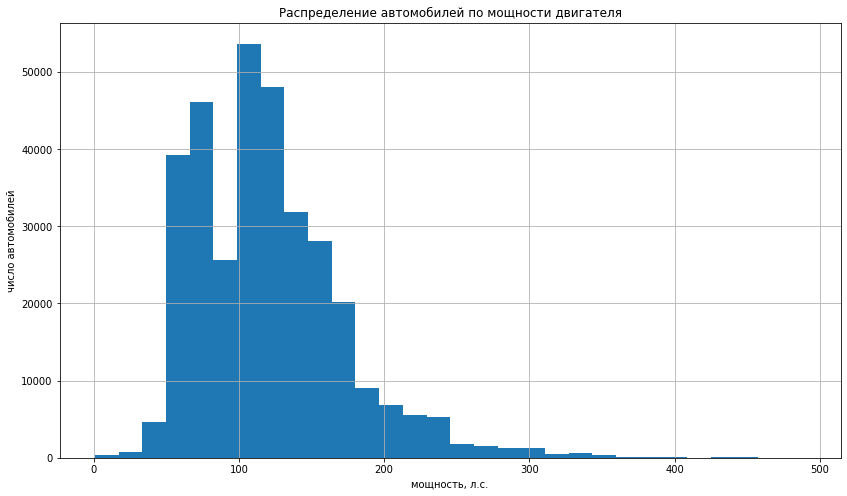

In [51]:
plt.figure(figsize=(14,8))

data['power'].hist(bins=30)

plt.title('Распределение автомобилей по мощности двигателя') 
plt.xlabel('мощность, л.с.') 
plt.ylabel('число автомобилей')
plt.show() 

Теперь значения мощности выглядят правдоподобными.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы не множить количество одинаковых значений в распределении, можно попробовать искать среднее внутри каких-то групп (например, по модели, бренду, типу топлива и т.д.) и заменять 0 ими.

Рассмотрим значения пробега автомобилей.

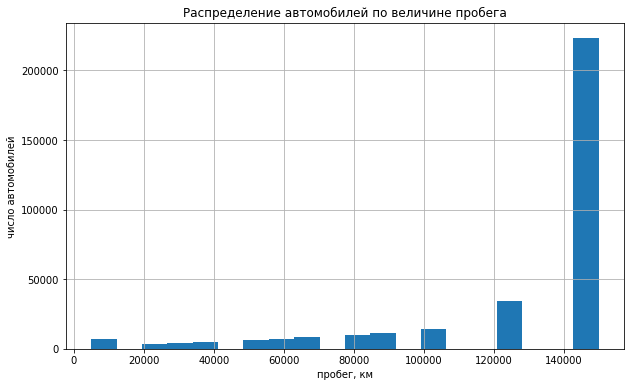

In [52]:
data['kilometer'].hist(bins=20,figsize=(10, 6))
plt.title('Распределение автомобилей по величине пробега') 
plt.xlabel('пробег, км') 
plt.ylabel('число автомобилей')
plt.show() 

Судя по гистограмме, пробег принимает дискретные значения.

Выведем все уникальные значения пробега.

In [53]:
data['kilometer'].unique()

array([150000, 125000,  90000,  40000,  30000,  70000, 100000,  60000,
         5000,  20000,  80000,  50000,  10000])

Действительно, значения пробега ограничены набором значений, поэтому можно считать пробег категориальной переменной.

Месяц регистрации формально является численной переменной, но по сути тоже является категориальной.

Построим гистограмму значений для месяца регистрации.

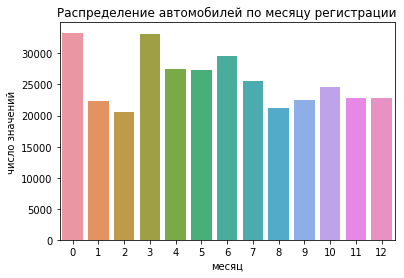

In [54]:
sns.countplot(data=data, x='registration_month')

plt.title('Распределение автомобилей по месяцу регистрации') 
plt.xlabel('месяц') 
plt.ylabel('число значений')
plt.show() 

Из гистограммы видно, что столбец с месяцем регистрации содержит много нулевых значений. Заменять нули не будем, их примерно столько же, сколько зарегистрированных автомобилей в каждый месяц, а в целом распределение машин по месяцам равномерное (исключая январь и февраль). Этот признак категориальный, "0" будет дополнительной категорией. 

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Это допустимый вариант, поскольку удалять эти ошибка слишком затратно - потеряем много данных, а воостановить не представляемся возможным. Однако в целом мы можем избавиться от данного признака, поскольку вряд ли он сможет как-то помочь в объяснении ценовых различий.

Теперь исследуем количество фотографий.

Посмотрим, какие значения принимает эта переменная.

In [55]:
data['number_of_pictures'].unique()

array([0])

Число фотографий принимает только нулевые значения, значит она не представляет интерес для нашей модели, можно ее удалить из датафрейма.

In [56]:
data=data.drop(['number_of_pictures'],axis=1)

Посмотрим, сколько разных значений принимает почтовый индекс. 

In [57]:
data['postal_code'].nunique()

8135

In [58]:
data['postal_code'].unique()

array([70435, 66954, 90480, ..., 89446, 38528, 38325])

Почтовый индекс тоже можно отнести к категориальным переменным. Но значений у него слишком много, модель будет долго обучаться, поэтому исключим его из признаков вовсе.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Почтовый индекс может быть задействован. Можно предположить, что это 5-значные индексы США, и брать из них первые несколько цифр. Обрати внимание: из-за того, что признак хранится в числовом формате, первые нули в индексе могли потеряться.

Теперь рассмотрим строковые переменные, которые , конечно, являются категориальными.

#### Категориальные переменные

Построим категориальные гистограммы для типа кузова, коробки передач, типа топлива, марки и индикатора, была ли машина в ремонте.

Модели автомобилей были рассмотрены в [п.1.1](#section1), их очень много, чтобы строить для них категориальную гистограмму.

Построим категориальную гистограмму для типа кузова.

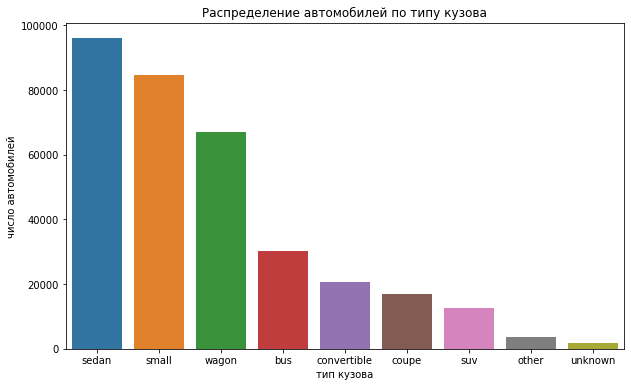

In [59]:
plt.figure(figsize=(10,6))

sns.countplot(data=data, x='vehicle_type',order=data['vehicle_type'].value_counts(ascending=False).index)

plt.title('Распределение автомобилей по типу кузова') 
plt.xlabel('тип кузова') 
plt.ylabel('число автомобилей')
plt.show() 

Самый распространенный тип кузова - седан, затем идут малолитражки и автофургоны, категория неизвестных оказалась на 4 месте, то есть составляет внушительную долю данных.

Построим категориальную гистограмму для коробки передач.

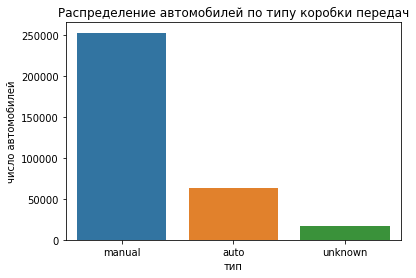

In [60]:
sns.countplot(data=data, x='gearbox')

plt.title('Распределение автомобилей по типу коробки передач') 
plt.xlabel('тип') 
plt.ylabel('число автомобилей')
plt.show() 

Большинство автомобилей имеет ручную коробку передач, автоматов примерно в 4 раза меньше, и прибавилась категория неизвестной коробки.

Построим категориальную гистограмму для типа топлива.

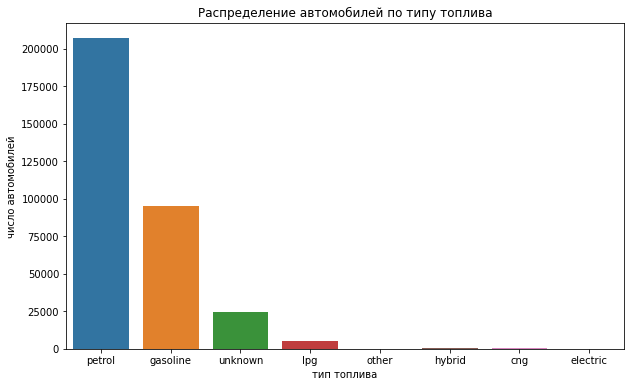

In [61]:
plt.figure(figsize=(10,6))

sns.countplot(data=data, x='fuel_type')

plt.title('Распределение автомобилей по типу топлива') 
plt.xlabel('тип топлива') 
plt.ylabel('число автомобилей')
plt.show() 

Большинство автомобилей ездит на бензине, затем на газу в 2 раза меньше, и новая неизвестная категория занимает теперь большую долю от наблюдений.

Построим категориальную гистограмму для марки автомобиля.

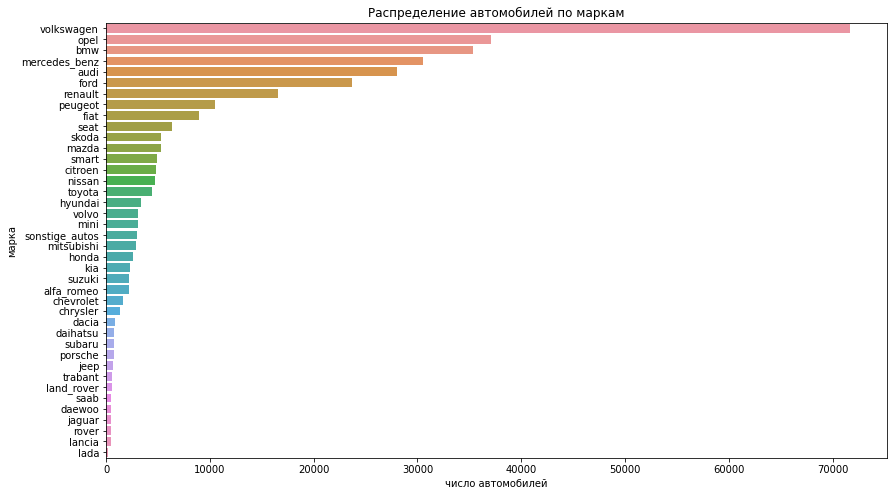

In [62]:
plt.figure(figsize=(14,8))

sns.countplot(data=data, y='brand',orient='h',order=data['brand'].value_counts(ascending=False).index)

plt.title('Распределение автомобилей по маркам') 
plt.xlabel('число автомобилей') 
plt.ylabel('марка')
plt.show() 

Самая популяргая марка - volkswagen,затем  opel и bmv.

Построим категориальную гистограмму для пребывания машины в ремонте.

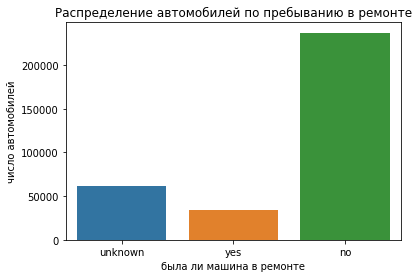

In [63]:
sns.countplot(data=data, x='repaired')

plt.title('Распределение автомобилей по пребыванию в ремонте') 
plt.xlabel('была ли машина в ремонте') 
plt.ylabel('число автомобилей')
plt.show() 

Большинство машин не было в ремонте, неуказанных машин очень много - больше, чем тех, что были в ремонте. 

Исследуем распределение целевого признака - цены автомобилей.

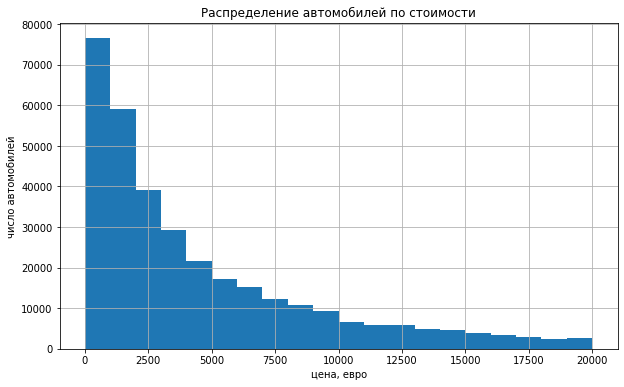

In [64]:
plt.figure(figsize=(10,6))
data['price'].hist(bins=20)

plt.title('Распределение автомобилей по стоимости') 
plt.xlabel('цена, евро') 
plt.ylabel('число автомобилей')
plt.show() 

Опять мы видим много нулевых значений. Оценим их долю среди всех наблюдений.

In [65]:
data[data['price']==0].shape[0]/data.shape[0]

0.02877443232429871

Почти 3% явно ошибочных данных, но в данном случае распределение не похоже на нормальное, заменить нули средним значением будет некорректно.

Поэтому, несмотря на то, что 3% - это много, удалим данные с нулевой ценой, чтобы не испортить нашу модель предсказаний.

In [66]:
data=data[data['price']>0]

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> С избавлением от нулевой цены согласна! Однако я бы не стала считать их ошибочными, вполне могут быть случаи, когда что-то в совсем плачевном состоянии готовы отдать даром, например, на разборку. В данном случае наша мотивация избавиться от нулей скорее в том, чтобы не обучать модель предсказывать нули. Это сомнительно - клиент, не готовый отдавать что-то совсем даром, вряд ли будет рад увидеть такую оценку для своего автомобиля.

<a id='section2'></a>
#### Корреляционный анализ

Рассчитаем коэффициенты корреляции Фи между всеми признаками (числовыми и категориальными) средствами библиотеки phik.

В числовые переменные включим только цену и мощность двигателя, другие численные переменные по сути являются категориальными.

Из расчетов исключим еще переменные с датами и почтовый индекс, поскольку они принимают слишком много значений, phik не может рассчитать коэффициенты корреляции для них.

In [67]:
data1=data.drop(['date_crawled','date_created','postal_code','last_seen'],axis=1)
data1.phik_matrix(interval_cols=['price','power']).style.background_gradient(cmap="RdYlGn")

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired
price,1.000000,0.268356,0.670450,0.303847,0.482941,0.572027,0.324707,0.163937,0.270093,0.362532,0.358542
vehicle_type,0.268356,1.000000,0.531431,0.342136,0.475516,0.900418,0.185642,0.146018,0.329100,0.598723,0.191190
registration_year,0.670450,0.531431,1.000000,0.295254,0.288018,0.673359,0.625747,0.294017,0.421063,0.370662,0.362878
gearbox,0.303847,0.342136,0.295254,1.000000,0.461368,0.623640,0.171842,0.335764,0.352344,0.515859,0.454928
power,0.482941,0.475516,0.288018,0.461368,1.000000,0.789663,0.120261,0.057350,0.240770,0.599899,0.105407
model,0.572027,0.900418,0.673359,0.623640,0.789663,1.000000,0.435447,0.192657,0.538557,0.997805,0.264583
kilometer,0.324707,0.185642,0.625747,0.171842,0.120261,0.435447,1.000000,0.160582,0.191969,0.277264,0.217829
registration_month,0.163937,0.146018,0.294017,0.335764,0.057350,0.192657,0.160582,1.000000,0.283416,0.102145,0.396949
fuel_type,0.270093,0.329100,0.421063,0.352344,0.240770,0.538557,0.191969,0.283416,1.000000,0.334775,0.265495
brand,0.362532,0.598723,0.370662,0.515859,0.599899,0.997805,0.277264,0.102145,0.334775,1.000000,0.151497


Как видно из таблицы, цена имеет заметную корреляцию по шкале Чеддока с годом выпуска (0.67) и моделью (0.58),

умеренную корреляцию с мощностью двигателя (0.47), маркой (0.36), ремонтом(0.36), километражом (0.32) и коробкой передач (0.3).

Слабая корреляция наблюдается с типом топлива, кузова и месяцем регистрации.

<div class="alert alert-info">
Из таблицы еще можно увидеть сильную мультиколлинеарность между признаками "марка", "модель" и "тип кузова".
    
Объединим марку и модель в один признак brand_model, чтобы упростить нам обучение моделей.
    
Тип кузова считаю избыточным признаком, поэтому исключаю его из рассмотрения.
</div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> В целом корреляция с моделью довольно сильная, от удаления сильно в качестве не потеряем, хотя в целом какое-то дополнительное объяснение вариации таргета данный признак тоже мог дать.

In [68]:
data['brand_model']=data['brand']+'_'+data['model']

In [69]:
display(data.head())

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,postal_code,last_seen,brand_model
0,2016-03-24 11:52:17,480,sedan,1993,manual,104.461068,golf,150000,0,petrol,volkswagen,unknown,2016-03-24 00:00:00,70435,2016-04-07 03:16:57,volkswagen_golf
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190.000000,other,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,66954,2016-04-07 01:46:50,audi_other
2,2016-03-14 12:52:21,9800,suv,2004,auto,163.000000,grand,125000,8,gasoline,jeep,unknown,2016-03-14 00:00:00,90480,2016-04-05 12:47:46,jeep_grand
3,2016-03-17 16:54:04,1500,small,2001,manual,75.000000,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,91074,2016-03-17 17:40:17,volkswagen_golf
4,2016-03-31 17:25:20,3600,small,2008,manual,69.000000,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,60437,2016-04-06 10:17:21,skoda_fabia


<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Для вывода таблиц в красивом аккуратном оформлении лучше использовать display вместо print.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Для наглядности матрицу корреляций удобно выводить в виде pandas таблицы с добавлением <a href = 'https://pandas.pydata.org/docs/user_guide/style.html'>расцветки</a>, либо с помощью тепловой карты. Расцветку при этом стоит выбирать трехцветную, если диапазон возможных значений от -1 до 1 (например, синий, белый, красный, белый в 0), или двухцветную, если от 0 до 1 (в нуле белый, в 1 - красный). Поскольку на 0 будет нейтральный цвет, величину корреляции можно будет воспринимать через интенсивность цвета, а по самому цвету - положительная она или отрицательная.

Таким образом, исследовательский анализ выявил в данных существенные недостатки: большое количество явно ошибочных нулевых значений, а так же аномально высокие значения некоторых переменных.

Все недостатки данных устранены, данные готовы к работе.

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Отлично! С данными познакомились, можем переходить к моделированию.

## Обучение моделей

### Линейная регрессия

<div class="alert alert-info">
    <h2> Комментарий студента 2 <a class="tocSkip"> </h2>


    
В связи с заменой кодировщика на Ordinal Encoder предлагаю убрать из рассмотрения линейную регрессию, 
    
ячейки с кодом закомментирую.
</div>

Выделяем обучающую и тренировочную выборки в соотношении 3:1.

Из признаков, помимо числа фотографий, исключим все даты и почтовый код: если их кодировать, будет слишком много категорий, время обучения модели может увеличиться многократно.

<div class="alert alert-info">
Перевела год регистрации и километраж в количественные признаки, удалила марку, модель и тип кузова, но ввела новый категориальный признак 'brand_model'.
</div>

<div class="alert alert-success">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 😉

In [70]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(   
        ['date_crawled','date_created','postal_code','last_seen','price','brand','model','vehicle_type','registration_month'], 
        axis=1
    ),
    data['price'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)

Выделяем категориальные и количественные признаки.

In [71]:
# #категориальные признаки
# ohe_columns = [
#      'vehicle_type', 'registration_year','gearbox','model','kilometer','registration_month','fuel_type',\
#     'brand','repaired'
# ]

# #количественные признаки
# num_columns = ['power']

In [72]:
#категориальные признаки
ohe_columns = [
     'gearbox','brand_model','fuel_type','repaired'
]

#количественные признаки
num_columns = ['registration_year','kilometer','power']

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Год и километраж - это числовые дискретные признаки, но не категориальные. Их лучше оставить в виде чисел.

Создаём пайплайн для подготовки признаков из списка ohe_columns с помощью OHE-кодирования (при появлении в признаке неизвестных категорий появится ошибка).

In [73]:
# ohe_pipe = Pipeline(
#     [
#         (
#             'ohe', 
#              OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
#    #          OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
#         )
#     ]
# )

<div class="alert alert-info">
Изменила OHE-кодировщик, неизвестные значения будем игнорировать, пропуски заполнять самым часто встречающимся значением.
</div>    

In [74]:
# ohe_pipe = Pipeline(
#     [
#         (
#             'simpleImputer_ohe', 
#             SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#         ),
#         (
#             'ohe', 
#             OneHotEncoder( drop='first',handle_unknown='ignore', sparse_output=False)
#         )
#     ]
# )

Числовые категории масштабируем с помощью StandardScaler.

Пайплайн для подготовки данных:

In [75]:
# data_preprocessor = ColumnTransformer(
#    transformers = [
#       ('ohe', ohe_pipe, ohe_columns),
#        ('num', StandardScaler(), num_columns)
#    ])

Итоговый пайплайн для подготовки данных и задания модели линейной регрессии.

In [76]:
# pipe_final = Pipeline(
#     [
#         ('preprocessor', data_preprocessor),
#         ('models',LinearRegression())
#  #       ('models',DecisionTreeRegressor(random_state=RANDOM_STATE))
#     ]
# )

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> 
    
* Очень круто, что владеешь пайплайнами! Это позволяет упростить код и обезопасить себя от различных ошибок и утечек.
    
    
* Верно, что для линейной модели используешь OHE. Если применить порядковое кодирование к тем категориям, которые этого порядка по сути не имеют, то модель едва ли сможет нормально оценить влияние данного признака, поскольку будет искать линейную взаимосвязь там, где ее не подразумевается. По итогу признак становится бесполезным.
    
    
* Молодец, что используешь `drop='first'`. Про мультиколлинеарность выше уже говорила, здесь чуть дополню. Создание дамми-признаков для низкокардинальных категориальных признаком также приводит к мультиколлинеарности, чем меньше категорий - тем сильнее (при 2 категориях корреляция между двумя дамми-признаками будет равна 1). Исходя из этих соображений, принято отбрасывать один из дамми признаков, который по сути довольно просто выражается через все остальные. 

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Относительно стандартизации. На самом деле на деревянных моделях и на **простой** линейной регрессии масштабирование не окажет никакого влияния на предсказания. У моделей на основе деревьв принцип принятия решения завязан на относительности значений признаков (больше/меньше), а она при стандартизации воздействию не подвергается. С линейными регрессиями чуть интереснее: стандартизация никак себя не проявит, поскольку все изменения переменной уйдут в новые коэффициенты:
    
<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>

$y = \alpha + \beta x$ - без стандартизации и масштабирования
_____________________________________________________________________________________________________________________

$y = \alpha_{st} + \beta_{st} \frac{x-mean}{std} = (\alpha_{st} - \frac{\beta_{st}mean}{std}) + (\frac{\beta_{st}}{std}) x$ - со стандартизацией

При этом $\alpha = (\alpha_{st} - \frac{\beta_{st}mean}{std})$ и $\beta = (\frac{\beta_{st}}{std})$
_____________________________________________________________________________________________________________________

$y = \alpha_{mm} + \beta_{mm} \frac{x-min}{max-min} = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min}) + (\frac{\beta_{mm}}{max-min}) x$ - с масштабированием

При этом $\alpha = (\alpha_{mm} - \frac{\beta_{mm}min}{max-min})$ и $\beta = (\frac{\beta_{mm}}{max-min})$
_____________________________________________________________________________________________________________________

По ссылкам можно узнать, когда все-таки стандартизация крайне важна: <a href = 'https://www.listendata.com/2017/04/how-to-standardize-variable-in-regression.html'>тык</a>, <a href = 'https://www.statlect.com/fundamentals-of-statistics/linear-regression-with-standardized-variables'>тык</a>.

Одно из преимуществ стандартизации для линейной регрессии: мы можем по величине полученных коэффициентов судить о важности соотвествующих признаков (больше коэффициент - больше значимость). Без стандартизации такая интерпретация невозможна, так как каждый коэффициент в себя включает еще и элемент масштаба своего признака. Второй случай, когда стандартизация необходима - линейные регрессии с **регуляризацией** (ридж, лассо, эластик нет), поскольку данные модели регулируют те самые коэффициенты, на которые воздействует стандартизация. Ну и на всякий случай отмечу, что из-за особенностей формата float в некоторых знаках после запятой отличия все-таки будут, что может оказаться критичным, например, на соревнованиях.

</details>

Обучим модель линейной регрессии, при этом запомним время начала и окончания обучения модели, чтобы вывести время обучения на экран.

In [77]:
# start = time.perf_counter()   # Фиксируем время старта

# pipe_final.fit(X_train, y_train)

# end=time.perf_counter() # Останавливаем таймер
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

In [78]:
# model = pipe_final.named_steps['models']

Получим предсказания на тестовой выборке и снова выведем затраченное на него время

In [79]:
# start = time.perf_counter() 

# y_test_pred = pipe_final.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  # Останавливаем таймер
# print(f"Затрачено времени: {elapsed} сек")

Считаем метрику RMSE между предсказаниями и тестовым таргетным признаком.

In [80]:
# root_mean_squared_error(y_test_pred,y_test)

Значение метрики RMSE 2105, меньше 2500, значит модель качественная.

Время обучения порядка 40 секунд, время предсказания 0.7 секунды.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера <a class="tocSkip"></h3>

<b>На доработку🤔:</b> Сейчас ты все модели сравниваешь между собой по тестовой метрике. Это допустимый вариант, который встречается на практике, но необходимо помнить, что таким образом мы в некотором плане "переобучаемся" - подстраиваем свой выбор под конкретный тестовый набор. Поэтому, по крайней мере в Практикуме, условились эмулировать так называемый вывод модели в прод - то есть тестовый набор мы откладываем для проверки на нем только самой лучшей модели (или нескольких лучших), которые мы пустили в прод, чтобы посмотреть, как они ведут себя в реальной среде, на новых данных. Выбор при этом условились производить на основе (кросс-) валидационных показателей, которые представляют из себя более взвешенную оценку, менее подверженную влиянию особенностей выборки (как в случае выбора на основе тестовых показателей).
    
После перехода на сравние по (кросс-) валидационным метрикам не забудь про этап тестирования.

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера 2<a class="tocSkip"></h3>

<b>На доработку🤔:</b> Проблема, обозначенная выше, все еще не решена: сейчас для каждой модели считается метрика на тесте и выбор производится на основе нее. Нам же необходимо провести валидацию, сделать выбор и только потом одну выбранную модели проверить на тестовых данных.
    
Если нет желания проводить более затратную кросс-валидацию, то можно на этапе создания выборк делить данные не на трейн и тест, а на трейн, вал, тест, и для расчета метрик у всех моделей ипользовать вал, тест же как рах отложить на конец.

<div class="alert alert-info">
    <h2> Комментарий студента 2 <a class="tocSkip"> </h2>

    
Мне казалось, я реализовала это в п.2.2, когда случайным поиском выбрала лучшую модель, используя кросс-валидацию на 5 выборках.
        
Если я не права, прошу мне дать еще пояснения!
</div>

<div class="alert alert-block alert-danger">
<h3> Комментарий ревьюера 3<a class="tocSkip"></h3>

<b>На доработку🤔:</b> Рандомсерч на двух моделях реашает проблему только частично. Впоследствии же выбранная модель все равно сравнивается с катбустом и лгбм по тестовым показателям, что не хорошо. Сначла необходимо сравнить и выбрать модель, используя валидационные метрики (раз рандомсерч заработал теперь для всех моделей, то все необходимые метрки доступны в `cv_results_` и можно выбирать модель по ним, дополнительно ничего не рассчитывая), и только под конец, в самой последней ячейке с кодом, только для одной выбранной модели провести тестирование. Вот та таблица, которую ты выводишь под конец, она должна содержать валидационные показатели, и только после нее мы вспоминаем, что у нас существуют тестовая выборка.
    
Также обрати внимание, что `SGDRegressor` - это та же самая линейная регрессия, просто с иначе выстроенным алгоритмом обучения (вместо перемножения матриц, последовательный перебор точек в поисках наиболее близкой к оптимуму). Поэтому для нее порядковое кодирование не подходит, только OHE.

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Для всех моделей сделала подбор наилучшей с помощью RandomizedSearch, из таблиц cv_results_ сохранила среднее время обучения и предсказания и метрику RSME для наилучших моделей. 
    
Каждую найденную лучшую модель тоже сохраняем, чтобы потом осуществить предсказания на X_test.

</div>


<div class="alert alert-success">
<h3> Комментарий ревьюера 4<a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Супер! Теперь все, как надо :)

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Может встать вопрос, как замерять время, если использовать не обычную валидацию, а кросс-. Ниже варианты:
    
1. Если используешь для модели гридсерч, то из него сразу можно достать среднее время обучения (`mean_fit_time`) и оценки (`mean_score_time`) лучшей модели. Пример кода: `grid_cv.cv_results_['mean_fit_time'][grid_cv.best_index_]`. Однако следует уточнить, что mean_score_time включает не только время получения предсказаний, но и расчет метрики, но в нашем случае это допустимо.
    
    
2. Если подбор параметров не производится, то можно провести кросс-валидацию с помощью <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html'>cross_validate</a>, который по аналогии с гридсерчем помимо скоров на каждом сплите также логирует время обучения и время получения скора (предикт + оценка метрики).
    
    
Для удобства сравнения всех моделей впоследствии лучше где-то сохранять все результаты, а затем вывести их в удобную таблицу.

<div class="alert alert-info">
    
### Поиск наилучшей модели
    
</div>

<div class="alert alert-info">
Проведем поиск наилучшей модели с кросс-валидацией на 5 выборках случайным поиском среди:
    
- линейной регрессии
    
- дерева решений для задачи регрессии DecisionTreeRegressor
    
- стохастического градиентного спуска SGDRegressor.
    
Параметры моделей не будем подбирать, потому что даже без параметров случайный поиск по этим моделям работает 5 минут. 
    
</div>

In [81]:
#категориальные признаки
ord_columns = [
     'gearbox','brand_model','fuel_type','repaired'
]

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Заменяем кодировщик на OrdinalEncoder.
</div>

In [82]:
ord_pipe = Pipeline(
    [
         (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ), 
        (
            'ord',  
            OrdinalEncoder( 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

In [83]:
data_preprocessor = ColumnTransformer(
   transformers = [
     ('ord', ord_pipe, ord_columns),
      ('num', StandardScaler(), num_columns)
   ])

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Исключаем линейную регрессию из списка моделей-кандидатов из-за замены кодировщика.
</div>

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Из-за неподходящего кодировщика пришлось исключить и SGDRegressor из списка.
    
Подбор будем вести только для одной модели DecisionTreeRegressor.
</div>


In [84]:
param_distributions = [
    
#     {        
#         'models': [LinearRegression()],
#     },
   
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__min_samples_leaf': range(2, 10),
  #      'models__min_samples_split': range(2, 10),
 
    } ,
    
#     {
#         'models': [SGDRegressor(random_state=RANDOM_STATE)],

#     } ,
   
] 

In [85]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [86]:
randomized_search_all = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='neg_root_mean_squared_error', 
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=1000,
    cv=5
)

In [87]:
start = time.perf_counter()

randomized_search_all.fit(X_train, y_train) 

end=time.perf_counter()
elapsed =end - start  # Останавливаем таймер
print(f"Затрачено времени: {elapsed} сек")

/home/jovyan/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=1000. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Затрачено времени: 47.643700760090724 сек


In [88]:
pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(randomized_search_all.cv_results_)
display(result[
    ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','mean_score_time','params']
].sort_values('rank_test_score')) 


,rank_test_score,param_models,mean_test_score,mean_fit_time,mean_score_time,params
6,1,DecisionTreeRegressor(random_state=42),-1828.205390,0.976875,0.106116,"{'models__min_samples_leaf': 8, 'models': DecisionTreeRegressor(random_state=42)}"
5,2,DecisionTreeRegressor(random_state=42),-1829.828922,1.045668,0.124327,"{'models__min_samples_leaf': 7, 'models': DecisionTreeRegressor(random_state=42)}"
7,3,DecisionTreeRegressor(random_state=42),-1830.524494,0.982789,0.111642,"{'models__min_samples_leaf': 9, 'models': DecisionTreeRegressor(random_state=42)}"
4,4,DecisionTreeRegressor(random_state=42),-1834.104401,0.993000,0.117602,"{'models__min_samples_leaf': 6, 'models': DecisionTreeRegressor(random_state=42)}"
3,5,DecisionTreeRegressor(random_state=42),-1835.869384,1.002877,0.109211,"{'models__min_samples_leaf': 5, 'models': DecisionTreeRegressor(random_state=42)}"
2,6,DecisionTreeRegressor(random_state=42),-1846.909990,1.030853,0.112451,"{'models__min_samples_leaf': 4, 'models': DecisionTreeRegressor(random_state=42)}"
1,7,DecisionTreeRegressor(random_state=42),-1871.314987,1.067836,0.116056,"{'models__min_samples_leaf': 3, 'models': DecisionTreeRegressor(random_state=42)}"
0,8,DecisionTreeRegressor(random_state=42),-1918.569746,1.082509,0.120299,"{'models__min_samples_leaf': 2, 'models': DecisionTreeRegressor(random_state=42)}"


In [89]:
time_1_best=result['mean_fit_time'][result['rank_test_score']==1].iloc[0]
time_2_best=result['mean_score_time'][result['rank_test_score']==1].iloc[0]
metrics_best=-result['mean_test_score'][result['rank_test_score']==1].iloc[0]

In [90]:
best_model_DecisionTree = randomized_search_all.best_estimator_

<div class="alert alert-info">
Лучшей моделью по результатом поиска оакзалась DecisionTreeRegressor, она выдала самое маленькое значение метрики  RSME  и самое маленькое время на обучение.
    
Рассчитаем теперь время предсказания и метрику на тестовой выборке.
</div>

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> В прошлый раз в комментарии к кодированию в катбусте говорила, что для деревьев, лесов и xgboost, у которых нет встроенных кодировщиков, для признаков с большим количеством категорий лучше использовать порядковое кодирование вместо OHE. Иначе для достижения хорошей точности в этом случае необходимо растить очень глубокое дерево, что достаточно ресурсозатратно. По этой причине такие деревья часто остаются недообученными и несбалансированными.
    
Время предсказания можно было достать из рандомсерча: mean_score_time

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Добавила mean_score_time.
    
Теперь считаем предсказание и метрику лучшей модели на тестовой выборке.
</div>

In [91]:
# start = time.perf_counter()

# best_model.fit(X_train,y_train)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")
# time_1_best=elapsed

In [92]:
# start = time.perf_counter() 

# y_pred=best_model.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

# time_2_best=elapsed
# metrics_best=root_mean_squared_error(y_pred,y_test)

<div class="alert alert-info">
Метрика удовлетворяет требованиям, время предсказания меньше секунды, поэтому модель можно считать лучшей из предложенных.
</div>

### Стохастический градиентный спуск для линейной регрессии

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
 
Поскольку SGDRegressor пришлось исключить из поиска лучших моделей, сделала для него отдельный подбор гиперпараметров случайным поиском, используя кодировщик  OneHotEncoder.

</div>


<div class="alert alert-info">
SGDRegressor вставила в случайный поиск (предыдущий пункт).
    
Весь код в этом пункте закомментировала, чтобы не тратилось время на выполнение.
</div>

In [93]:
 ohe_pipe = Pipeline(
    [
         (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
             OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
   #          OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

In [94]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('num', MinMaxScaler(), num_columns)
    ], 
#    remainder='passthrough'
)


In [95]:
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
    
        ('models',DecisionTreeRegressor(random_state=RANDOM_STATE))
    ]
)

In [96]:
param_distributions = {
   
    'models' : [SGDRegressor(random_state=RANDOM_STATE)],
        
    'models__max_iter': [100, 200],
   
    
}

In [97]:
rs = RandomizedSearchCV(
    pipe_final,
    param_distributions,
    n_iter=100, 
    cv=5,  
    scoring='neg_root_mean_squared_error',  
    random_state=RANDOM_STATE,
    n_jobs=-1  
)

In [98]:
start = time.perf_counter()

rs.fit(X_train, y_train) 

end=time.perf_counter()
elapsed =end - start  
print(f"Затрачено времени: {elapsed} сек")

/home/jovyan/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/jovyan/.local/lib/python3.9/site-packag

Затрачено времени: 431.96840498410165 сек


In [99]:
pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(rs.cv_results_)
display(result[
    ['rank_test_score',  'mean_test_score','mean_fit_time','mean_score_time','params']
].sort_values('rank_test_score')) 


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
1,1,-2674.922826,46.499736,0.369476,"{'models__max_iter': 200, 'models': SGDRegressor(random_state=42)}"
0,2,-2677.145084,27.298779,0.369046,"{'models__max_iter': 100, 'models': SGDRegressor(random_state=42)}"


In [100]:
time_1_rs_SGD=result['mean_fit_time'][result['rank_test_score']==1].iloc[0]
time_2_rs_SGD=result['mean_score_time'][result['rank_test_score']==1].iloc[0]
metrics_rs_SGD=-result['mean_test_score'][result['rank_test_score']==1].iloc[0]

In [101]:
best_model_SGD = rs.best_estimator_

Применим стохастический градиентный спуск по мини-батчам для линейной регрессии.

Для начала преобразуем тренировочную и тестовую выборку с помощью preprocessor, чтобы категориальные признаки принимали числовые значения.

In [102]:
# #получаем названия столбцов признаков
# preprocessor=pipe_final.named_steps['preprocessor']


# a=preprocessor.transformers_[0][1].named_steps['ord'].get_feature_names_out()
# b=num_columns

# columns=pd.concat([pd.Series(a),pd.Series(b)])

# X_train_transformed =  pd.DataFrame(
#     preprocessor.transform(X_train),
#     columns=columns   
# ) 
# X_test_transformed =  pd.DataFrame(
#     preprocessor.transform(X_test),
#     columns=columns   
# ) 

Переименуем трансформированные выборки для удобства подстановки в готовый алгоритм.

In [103]:
# features_train=X_train_transformed
# target_train=y_train

# features_test=X_test_transformed
# target_test= y_test

In [104]:
# #объявление класса SGD для модели линейной регрессии     
# class SGDLinearRegression:
#     def __init__(self, step_size, epochs, batch_size):
#         self.step_size = step_size
#         self.epochs = epochs
#         self.batch_size = batch_size
    
#     def fit(self, train_features, train_target):
#         X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)        
#         y = train_target
#         w = np.zeros(X.shape[1])
        
#         for _ in range(self.epochs):
#             batches_count = int(X.shape[0]/self.batch_size)
#             for i in range(batches_count):
#                 begin = i * self.batch_size
#                 end = (i + 1) * self.batch_size
#                 X_batch = X[begin:end, :]
#                 y_batch = y[begin:end]
                
#                 gradient = 2 * X_batch.T.dot(X_batch.dot(w) - y_batch) / X_batch.shape[0]
                
#                 w -= gradient*self.step_size

#         self.w = w[1:]
#         self.w0 = w[0]
#         self.batches_count = batches_count
        
#     def predict(self, test_features):
#         return test_features.dot(self.w) + self.w0
    

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> У sklearn имеется готовая реализация данного алгоритма - <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>.

Обучение модели SGDLinearRegression:

In [105]:
# model = SGDLinearRegression(0.01, 2, 100)# гиперпараметры: величина шага,  количество эпох и размер батча.

# start = time.perf_counter() 

# model.fit(features_train, target_train)

# end=time.perf_counter()
# elapsed =end - start  # Останавливаем таймер
# print(f"Затрачено времени: {elapsed} сек")

Получение предсказаний моделью:

In [106]:
# start = time.perf_counter() 
# pred_train = model.predict(features_train)

# pred_test = model.predict(features_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

Вычисление  RMSE между предсказаниями и таргетным признаком на тестовой выборке.

In [107]:
# print(mean_squared_error(target_test, pred_test,squared=False).round(5)) 

Значение метрики RMSE 2258 на тестовой выборке, меньше 2500, значит модель качественная.

Время обучения порядка 30 секунд, время предсказания 0.16 секунды.

Возьмем другие гиперпараметры модели:уменьшим величину шага и увеличим количество эпох.

Посмотрим, как изменится время обучения модели.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Чтобы не повторять один и тот же код, можно доверить перебор гридсерчу. О том, как из-него достать время, говорила выше. Метрики для каждого набора параметров также можно вытащить из этого атрибута `cv_results_`.
    
В целом гридсерч можно даже запустить для перебора оценщиков. Примеры можно посмотреть <a href = 'https://www.kaggle.com/code/ksvmuralidhar/multiple-model-hyperparameter-tuning-with-pipeline'>тут</a>, <a href = 'https://stackoverflow.com/questions/23045318/grid-search-over-multiple-classifiers'>тут</a> или <a href = 'https://stackoverflow.com/questions/23045318/grid-search-over-multiple-classifiers'>тут</a>.

In [108]:
# model = SGDLinearRegression(0.005, 4, 100)# гиперпараметры: величина шага,  количество эпох и размер батча.

# start = time.perf_counter() 

# model.fit(features_train, target_train)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

Теперь посмотрим на время предсказания.

In [109]:
# start = time.perf_counter() 
# pred_train = model.predict(features_train)

# pred_test = model.predict(features_test)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

RMSE между предсказаниями и таргетным признаком на тестовой выборке:

In [110]:
# print(mean_squared_error(target_test, pred_test,squared=False).round(5)) 

Итого, на обучение модели ушло в 2 раза больше времени, предсказание стало быстрее на тестовой выборке, а метрика не изменилась.

### Градиентный бустинг библиотекой CatBoost

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Подберем гиперпараметры для CatBoost поиском RandomizedSearchCV.
</div>

<div class="alert alert-info">
Хотела реализовать подбор гиперпараметров для модели CatBoostRegressor через RandomizedSearchCV и OptunaSearchCV, но ни один из них не досчитал за полчаса, хотя я включила в словарь гиперпараметров по минимуму.
    
    
Не знаю, как с этим справляться.
    
Оставила предыдущее решение, поиск закомментировала, может быть вы мне подскажете, что я сделала не так.
</div>

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Можно попробовать уменьшить количество деревьев (`iterations`), выставить `thread_count=-1`, чтобы задействовать все доступные ресурсы, использовать `early_stopping_rounds`, чтобы обозначить количество проводимых итераций, после которых мы будем выходить из обучения, если метрика не продолжает улучшаться.

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Случайный поиск и Optuna заработали после внесения подсказанных параметров, время работы каждого поиска по 5 минут примерно.
    
Код из предыдущей версии задания закомментирую, чтобы не тратилось время на исполнение.
</div>

In [111]:
params = {
 
    'depth': [4,10],
    'learning_rate': [0.01,0.05] #скорость обучения
}

In [112]:
#категориальные признаки
cat_features = [
      'gearbox','fuel_type','brand_model','repaired'
]

In [113]:
regressor = CatBoostRegressor(iterations=100, random_state=RANDOM_STATE,thread_count=-1,early_stopping_rounds=20)

In [114]:
rs = RandomizedSearchCV(
    regressor,
    params,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=3,
#    n_iter=10,
    random_state=RANDOM_STATE
)

In [115]:
start = time.perf_counter() 

rs.fit(X_train, y_train, cat_features=cat_features, verbose=False)

end=time.perf_counter()
elapsed =end - start 
print(f"Затрачено времени: {elapsed} сек")

/home/jovyan/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Затрачено времени: 96.64804176287726 сек


In [116]:
print('Лучшая модель и её параметры:\n\n', rs.best_params_)

Лучшая модель и её параметры:

 {'learning_rate': 0.05, 'depth': 10}


In [117]:
pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(rs.cv_results_)
display(result[
    ['rank_test_score',  'mean_test_score','mean_fit_time','mean_score_time','params']
].sort_values('rank_test_score')) 


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
3,1,-1881.028034,8.972500,0.108666,"{'learning_rate': 0.05, 'depth': 10}"
1,2,-2107.854031,4.745862,0.084026,"{'learning_rate': 0.05, 'depth': 4}"
2,3,-2681.469197,8.960111,0.106339,"{'learning_rate': 0.01, 'depth': 10}"
0,4,-2958.041179,4.918774,0.081372,"{'learning_rate': 0.01, 'depth': 4}"


In [118]:
time_1_rs_catboost=result['mean_fit_time'][result['rank_test_score']==1].iloc[0]
time_2_rs_catboost=result['mean_score_time'][result['rank_test_score']==1].iloc[0]
metrics_rs_catboost=-result['mean_test_score'][result['rank_test_score']==1].iloc[0]

In [119]:
best_model_CatBoost = rs.best_estimator_

In [120]:
# start = time.perf_counter()

# best_model.fit(X_train,y_train,cat_features=cat_features, verbose=False)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")
# #time_1_rs_catboost=elapsed

In [121]:
# start = time.perf_counter() 

# y_pred=rs.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

# time_2_rs_catboost=elapsed
# metrics_rs_catboost=root_mean_squared_error(y_pred,y_test)

<div class="alert alert-info">
Предполагаемый поиск с помощью OptunaSearchCV.
</div>

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Для сокращения времени работы программы закомментировала поиск с помощью OptunaSearchCV (он занимает 5 минут примерно), его результаты не сильно отличаются от результатов случайного поиска.
</div>


In [122]:
# params = {
 
#     'max_depth': distributions.IntDistribution(4, 6),
#   }

In [123]:
# oscv = OptunaSearchCV(
#     regressor,
#     params,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     cv=3,
#    # n_iter=10,
#     random_state=RANDOM_STATE
# )

In [124]:
# #категориальные признаки
# cat_features = [
#       'gearbox','fuel_type','brand_model','repaired'
# ]

In [125]:
# start = time.perf_counter()

# oscv.fit(X_train,y_train,cat_features=cat_features, verbose=False)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

In [126]:
# best_model =oscv.best_estimator_

In [127]:
# start = time.perf_counter() 

# best_model.fit(X_train, y_train, cat_features=cat_features, verbose=False)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")
# time_1_oscv_catboost=elapsed

In [128]:
# print('Лучшая модель и её параметры:\n\n', oscv.best_params_)

In [129]:
# start = time.perf_counter() 

# y_pred=best_model.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

# time_2_oscv_catboost=elapsed
# metrics_oscv_catboost=root_mean_squared_error(y_pred,y_test)

Создаем модель CatBoostRegressor с максимальной глубиной дерева 4, скоростью обучения 0.01 и количеством деревьев в ансамбле 200.

In [130]:
# regressor = CatBoostRegressor(iterations=200, depth=4, learning_rate=0.01)

Передаем категориальные признаки, которые модель преобразует сама:

In [131]:
# cat_features = [
#      'vehicle_type', 'registration_year','gearbox','model','kilometer','registration_month','fuel_type',\
#     'brand','repaired'
# ]

In [132]:
# #категориальные признаки
# cat_features = [
#       'gearbox','fuel_type','brand_model','repaired'
# ]

<div class="alert alert-success">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3> 
    
<b>Все отлично! 👍:</b> Здорово, что кодирование доверяешь встроенному кодировщику! 
    
<details> <summary> <span style='color:blue' > Развернуть подробнее. </span> </summary>
    
Порядковое кодирование - допустимый вариант для моделей на основе деревьев (простые деревья, лес, lgbm, catboost, xgboost), однако не самый лучший выбор. Его все же лучше использовать по прямому назначению, для кодирования категорий, которые действительно имеют порядок (например, плохо, удовлетворительно, хорошо). Какое кодирование тогда выбирать?
    
Для простых деревьев, лесов и xgboost в случае, когда уникальных категорий немного (низкокардинальный признак), можно применять OHE. Однако если признак высококардинальный (много уникальных категорий) от такого подхода лучше воздержаться. Для достижения хорошей точности в этом случае необходимо растить очень глубокое дерево, что достаточно ресурсозатратно. По этой причине такие деревья часто остаются недообученными и несбалансированными. Вместо OHE лучшим вариантом будет считаться <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html'>TargetEncoder</a>. Однако данный подход требует регуляризации (например, разбиение на фолды, сглаживание), чтобы избежать утечки данных и переобучения. Это реализуется через кастомную функцию. Это не слишком сложно, но нужно подзаморочиться, в связи с чем пока можем остановить свой выбор на порядковом кодировании, которое в целом тоже допустимо, хоть и будет работать хуже.
    
Самым оптимальным решением в случае lgbm и catboost будет указание списка категориальных признаков в спициальном параметре данных моделей (`categorical_feature` и `cat_features соответсвнно`). У данных моделей предусмотрены встроенные кодировщики (TargetEncoder у lgbm и собственный кодировщик у catboost), которые самостоятельно закодируют и сделают это корректно.
<\details>

Обучаем модель:

In [133]:
# start = time.perf_counter() 

# regressor.fit(X_train, y_train, cat_features=cat_features, verbose=False)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

Получаем предсказания:

In [134]:
# start = time.perf_counter() 

# predictions = regressor.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

Вычисляем RMSE между предсказаниями и таргетным признаком на тестовой выборке

In [135]:
# root_mean_squared_error(predictions,y_test)

Градиентный бустинг CatBoost показал хорошее качество построенной модели, метрика RMSE 2344, время обучения около 40 сек. при выбранных гиперпараметрах.

Теперь увеличим в два раза число итераций и посмотрим, как изменится время обучения, предсказания и RMSE.

In [136]:
# regressor = CatBoostRegressor(iterations=400, depth=4, learning_rate=0.01)

In [137]:
# start = time.perf_counter() 

# regressor.fit(X_train, y_train, cat_features=cat_features, verbose=False)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

In [138]:
# start = time.perf_counter() 

# predictions = regressor.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

In [139]:
# root_mean_squared_error(predictions,y_test)

Время на обучение увеличилось примерно в 2 раза, на предсказание увеличилось ненамного (с 0.2 до 0.22 сек.), а метрика уменьшилась значительно: с 2343 до 2053.

Таким образом, качество модели явно улучшилось, но скорость обучения возросла значительно.

### Градиентный бустинг библиотекой LightGBM

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Подберем гиперпараметры для LGBMRegressor поиском RandomizedSearchCV.
</div>


<div class="alert alert-info">
Аналогично предыдущему пункту, подбор гиперпараметров не заработал за адекватное время ни для RandomizedSearchCV, ни для OptunaSearchCV.
    
Закомментировала поиск, оставила свое предыдущее решение.    
</div>

<div class="alert alert-warning">
<h3> Комментарий ревьюера 2<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> Здесь аналогичные рекомендации: выставить конкретное приемлемое количествоо деревьев, `n_jobs=-1` (в самом LGBMRegressor) и `stopping_rounds`. Кроме того, проблема еще точно в том, что здесь ты задействуешь OHE кодирование, которое сильно раздувает набор признаков из-за большого количества категорий. Для lgbm лучше задействовать встроенный кодировщик, передав в модель список категориальных признаков `categorical_feature`, они должны быть переведены в тип `category`.

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Аналогично предыдущему пункту, после внесения поправок оба поиска заработали, предыдущий код я закомментировала.
</div>


<div class="alert alert-info">
Randomised Search
</div>


In [140]:
params = {
 
    'max_depth': range(4, 6),
    
 }

In [141]:
#категориальные признаки
categorical_feature = [
     'gearbox','brand_model','fuel_type','repaired'
]

In [142]:
for c in categorical_feature:
    X_train[c] = X_train[c].astype('category')
    X_test[c]=X_test[c].astype('category')

In [143]:
#regressor=LGBMRegressor(objective='regression',random_state=RANDOM_STATE,n_jobs=-1,early_stopping_rounds=20)
regressor=LGBMRegressor(objective='regression',random_state=RANDOM_STATE,n_jobs=-1)


In [144]:
rs = RandomizedSearchCV(
    regressor,
    params,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=3,
    n_iter=10,
    error_score='raise',
    random_state=RANDOM_STATE
)

In [145]:
start = time.perf_counter() 

rs.fit(X_train, y_train, categorical_feature=categorical_feature)

end=time.perf_counter()
elapsed =end - start 
print(f"Затрачено времени: {elapsed} сек")

/home/jovyan/.local/lib/python3.9/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Us

Затрачено времени: 30.182860435917974 сек


In [146]:
print('Лучшая модель и её параметры:\n\n', rs.best_params_)

Лучшая модель и её параметры:

 {'max_depth': 5}


In [147]:
pd.set_option('display.max_colwidth', None)
result = pd.DataFrame(rs.cv_results_)
display(result[
    ['rank_test_score',  'mean_test_score','mean_fit_time','mean_score_time','params']
].sort_values('rank_test_score')) 


,rank_test_score,mean_test_score,mean_fit_time,mean_score_time,params
1,1,-1717.794849,3.963107,0.806478,{'max_depth': 5}
0,2,-1764.985101,3.088611,0.668539,{'max_depth': 4}


In [148]:
time_1_rs_LGBM=result['mean_fit_time'][result['rank_test_score']==1].iloc[0]
time_2_rs_LGBM=result['mean_score_time'][result['rank_test_score']==1].iloc[0]
metrics_rs_LGBM=-result['mean_test_score'][result['rank_test_score']==1].iloc[0]

In [149]:
best_model_LGBM = rs.best_estimator_

In [150]:
# start = time.perf_counter()

# best_model.fit(X_train,y_train,categorical_feature=categorical_feature)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")
# time_1_rs_LGBM=elapsed

In [151]:
# start = time.perf_counter() 

# y_pred=best_model.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

# time_2_rs_LGBM=elapsed
# metrics_rs_LGBM=root_mean_squared_error(y_pred,y_test)


<div class="alert alert-info">
OptunaSearchCV
</div>


<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Закомментировала поиск с помощью OptunaSearchCV, занимает почти 5 минут.
</div>


In [152]:
# params = {
 
#     'max_depth': distributions.IntDistribution(4, 6),
    
#   #  'learning_rate': distributions.IntDistribution(0.01,0.05) #скорость обучения
# }

In [153]:
# oscv = OptunaSearchCV(
#     regressor,
#     params,
#     scoring='neg_root_mean_squared_error',
#     n_jobs=-1,
#     cv=3,
#    # n_iter=10,
#     random_state=RANDOM_STATE
# )

In [154]:
# start = time.perf_counter() 

# oscv.fit(X_train, y_train,categorical_feature=categorical_feature)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")

In [155]:
# start = time.perf_counter()

# best_model.fit(X_train,y_train,categorical_feature=categorical_feature)

# end=time.perf_counter()
# elapsed =end - start 
# print(f"Затрачено времени: {elapsed} сек")
# time_1_oscv_LGBM=elapsed

In [156]:
# start = time.perf_counter() 

# y_pred=best_model.predict(X_test)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

# time_2_oscv_LGBM=elapsed
# metrics_oscv_LGBM=root_mean_squared_error(y_pred,y_test)

Создадим регрессионную модель с использованием LightGBM.

Сначала преобразуем тренировочную и тестовую выборки в lgb.Dataset.

In [157]:
# train_data = lgb.Dataset(X_train_transformed , label=y_train)

# test_data = lgb.Dataset(X_test_transformed, label=y_test, reference=train_data)

Зададим словарь параметров для настройки регрессионной модели LightGBM.

In [158]:
# params = {
#     'objective': 'regression', #тип задачи -регрессия
#     'metric': 'rmse', #метрика, которую будем улучшать
#     'boosting_type': 'gbdt', #метод обучения - градиентный бустинг
#     'num_leaves': 31, #макс.кол-во конечных узлов в дереве
#     'learning_rate': 0.05, #скорость обучения
#     'feature_fraction': 0.9, #доля признаков, кот. будет использоваться для обучения деревьев решений
# }


Обучим модель LightGBM на тренировочных данных, число итераций зададим 100.
 
Используется ранняя остановка, когда модель отслеживает, как она работает на наборе тестовых данных, и прекращает обучение, если после 10 раундов не наблюдается никаких улучшений. 

In [159]:
# start = time.perf_counter()

# num_round = 100
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=10)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

Получаем предсказания тестовой выборки и считаем метрику RMSE между предсказанием и тестовыми значениями, хотя она уже посчитана на последнем шаге 

In [160]:
# start = time.perf_counter()

# y_pred = bst.predict(X_test_transformed)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(root_mean_squared_error(y_test, y_pred)) 

Предсказание происходит за 1.5 сек.

Можно еще построить график важности признаков для найденной модели (10 наиболее важных).

In [161]:
# lgb.plot_importance(bst, figsize=(8,6),max_num_features=10);

Из графика видно, что наибольшую значимость внес признак "мощность", а также год выпуска.

Попробуем взять в 2 раза меньше итераций.

In [162]:
# start = time.perf_counter()

# num_round = 50
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=10)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

In [163]:
# start = time.perf_counter()

# y_pred = bst.predict(X_test_transformed)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(mean_squared_error(y_test, y_pred)) 

Время работы алгоритма  уменьшилось с 14.7 до 5.5 сек., предсказание 1.1 сек.,метрика RMSE  на последнем шаге  увеличилась с 1941 до 2218.

Таким образом, мы выиграли во времени, но проиграли в точности.

Теперь наоборот, возьмем в 2 раза больше итераций.

In [164]:
# start = time.perf_counter()

# num_round = 200
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data],early_stopping_rounds=10)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

In [165]:
# start = time.perf_counter()

# y_pred = bst.predict(X_test_transformed)

# end=time.perf_counter()
# elapsed =end - start  
# print(f"Затрачено времени: {elapsed} сек")

# print(root_mean_squared_error(y_test, y_pred)) 

Время работы алгоритма составило 19.7 сек., предсказание 2.4 сек., метрика RMSE  на последнем шаге составила всего 1808.

<div class="alert alert-warning">
<h3> Комментарий ревьюера <a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> `lgb.train` - это базовая функция обучения, которая предоставляет больше гибкости и возможности контроля (требуется более глубокое знакомство с данным алгоритрам, чтобы полномерно воспользоваться данными преимуществами). Нам же для использования сейчас вполне подойдет надстройка над этой функцией - <a href='https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMRegressor.html'>LGBMRegressor</a>, которая по синтаксису похожа на уже привычные модели из sklearn и удобно интегрируется с его методами, что позволит на ряду с прочими моделями использовать пайплайны, кросс-валидацию, гридсерч.

<div class="alert alert-info">
Таким образом, исправлен фильтр по году регистрации,  
    
заменены  категориальные и количественные признаки,
    
реализован поиск лучшей модели среди линейной регрессии, дерева решений и SGD для модели линейной регрессии на основе кросс-валидации.
    
К сожалению, не получилось реализовать подбор гиперпараметров для моделей  LGBMRegressor и CatBoost.
</div>

## Анализ моделей

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Теперь можем представить таблицу сравнения моделей:
</div>

<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Теперь выводим лучшие найденные модели с параметрами из таблиц cv_results_ для каждого поиска.
</div>


In [166]:
data_model = [
    ['Лучшая модель DecisionTreeRegressor',time_1_best, time_2_best, metrics_best],
    ['Лучшая модель SGD',time_1_rs_SGD, time_2_rs_SGD, metrics_rs_SGD],
    ['Лучшая модель CatBoost', time_1_rs_catboost, time_2_rs_catboost, metrics_rs_catboost],
#    ['Лучшая модель из CatBoost OptunaSearch', time_1_oscv_catboost, time_2_oscv_catboost, metrics_oscv_catboost],
    ['Лучшая модель LightGBM', time_1_rs_LGBM, time_2_rs_LGBM,metrics_rs_LGBM],
#    ['Лучшая модель из LightGBM OptunaSearch', time_1_oscv_LGBM, time_2_oscv_LGBM, metrics_oscv_LGBM]
]
df = pd.DataFrame(data_model,columns=['Модель','Время обуч.','Время предск.','RMSE'])

display(df)

,Модель,Время обуч.,Время предск.,RMSE
0,Лучшая модель DecisionTreeRegressor,0.976875,0.106116,1828.205390
1,Лучшая модель SGD,46.499736,0.369476,2674.922826
2,Лучшая модель CatBoost,8.972500,0.108666,1881.028034
3,Лучшая модель LightGBM,3.963107,0.806478,1717.794849


<div class="alert alert-info">
<h2> Комментарий студента 3 <a class="tocSkip"> </h2>
    
Лучшей по метрике оказалась LightGBM, для нее рассчитаем метрику на тестовой выборке.
</div>

In [167]:
y_pred=best_model_LGBM.predict(X_test)
print(f'Метрика на тестовой выборке: {root_mean_squared_error(y_pred,y_test)}') 

Метрика на тестовой выборке: 1701.9896300909872


<div class="alert alert-warning">
<h3> Комментарий ревьюера 4<a class="tocSkip"> </h3>
    
<b>Некоторые замечания и рекомендации💡:</b> На этапе тестирования можно чуть ближе познакомиться с выбранной моделью, разобрав ее предсказания и ошибки в них. Для этого можно простроить графики рассеяния таргета с предсказаниями и таргета с ошибками.

<div class="alert alert-info">
<h2> Комментарий студента 2 <a class="tocSkip"> </h2>
    
Самой оптимальной моделью оказалась LightGBM, и по времени обучения/предсказания, и по метрике.
</div>

Для построения модели прогноза цены автомобиля были рассмотрены 4 модели: линейная регрессиия, стохастический градиентный спуск для линейной регрессии, градиентный бустинг с помощью библиотек CatBoost и LightGBM.

Все модели справились с задачей: значение метрики RMSE на тестовой выборке для всех моделей оказалось меньше 2500.

Самую маленькую метрику RMSE 1808 показала модель LightGBM при 200 итерациях (гиперпараметры модели перечислены при ее задании), при этом время ее обучения составило 19.7 сек, время предсказания 2.4 сек.

CatBoostRegressor при числе итераций 400 выдала метрику RMSE 2053, но время ее обучения составило 77 сек., предсказания 0.2 сек.

Линейная регрессия показала метрику  RMSE 2105 и обучалась 40 секунд, предсказание 0.7 сек.

Стохастический градиентный спуск для линейной регрессии показал самую большую метрику RMSE 2258, но модель обучалась 30 сек.,предсказание 0.16 сек.

Таким образом, лучшей моделью по метрике и по времени обучения  признана LightGBM при 200 итерациях, хотя ее время предсказания получилось наибольшим.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Мария, спасибо за твой проект! Мне очень понравилась твоя работа! В тебе виден будущий профессионал своего дела :) Есть лишь пара моментов, которые необходимо скорректировать, чтобы проект можно было зачесть.
    
Кратко пройдусь по впечатлениям. 

**Отмечу отдельные положительные моменты проекта🙂**:
 
* Прекрасное владение инструментами обработки данных!
* Умелое проведение машинного обучения!
* Все этапы работы проделаны очень осмысленно! Каждый шаг снабжен пояснениями и вдумчивыми выводами!
* Работа имеет четкую структуру и выполнена аккуратно, проверять - одно удовольствие!

    
**На что стоит обратить внимание🤓**:
   
* Опционально: иначе заполнить категориальные признаки.
* Скорреетировать фильтрацию по году регистрации. 
* Сравнивать модели на основе (кросс-) валидационных оценок.

**Желаю удачи и жду твой проект на повторное ревью!**😉
    
<img src="https://99px.ru/sstorage/86/2015/12/image_86271215043043632690.gif" />

<div class="alert alert-success">
<b>Комментарий ревьюера 4:</b> Проект полностью готов, ты мастерски справилась с рекомендациями! Было очень приятно с тобой поработать :) Желаю огромных успехов в дальнейшем обучении и карьерных достижений! 🍀